# **Project Name**    - **NETFLIX Movies AND TV Shows Clustering**



##### **Project Type**    - **Unsupervised**
##### **Contribution**    - **Individual**



# **Project Summary -**

First I do Exploratory Data Analysis on the dataset. Check the Null values replace the null space ('no director','no cast'). Check duplicate value. But there are no duplicate value in this dataset. Next Data Wrangling replace rating word(TV-Y, TV-Y7) in adult,teen etc.Next Data Visualization and understand the relationship between variables.
Text Preprocessing Techniques,Remove Punctuations,Remove Stopwords,Stemming,TF-IDF Vectorizer.

Then use clustering method like Silhouette score(KMeans),Elbow Method(KMeans), DBSCAN, Dendrogram, Agglomerative clustering


# **GitHub Link -**

https://github.com/JyotiSingh0996/Netflix-movies-TV-shows-clustering-capstone_project-4.git

# **Problem Statement**


Netflix, Inc. is an American subscription streaming service and production company. Launched on August 29, 1997, it offers a film and television series library through distribution deals as well as its own productions, known as Netflix Originals.

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
import math
import scipy.stats as stat
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10
#necessary imports for plotly and map
import os
import re
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
import re, string, unicodedata
import nltk
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
from sklearn import preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch
     


### Dataset Loading

In [ ]:
# Mounting drive.
from google.colab import drive
drive.mount('/content/drive')
     

In [ ]:
# load the data from drive
movies_df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
movies_df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
movies_df.shape

there are 7787 rows and 12 columns

Check the Datatype

In [ ]:
movies_df.dtypes

date_added is having datatype as object we need to convert it to date-time.

### Dataset Information

In [ ]:
# Dataset Info
movies_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
movies_df.duplicated().sum()


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
movies_df.isna().sum()

* We can clearly see there are null alues present in director, cast, country, date_added and rating.
* We have 30% of values as null in director so instead of dropping we can fill those values with 'No Director' same for cast and country.
* We can drop null values from date_added and rating as there are not much null values.

In [ ]:
# null values treatment
movies_df['country'] = movies_df['country'].fillna('No Country')
movies_df['director'] = movies_df['director'].fillna('No Director')
movies_df['cast'] = movies_df['cast'].fillna('No Cast')
movies_df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(movies_df.isnull(), cbar=True, yticklabels=False,cmap="Purples_r")
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

### What did you know about your dataset?

 12 Columns in this Dataset show_id,type,title...Each variable has its important role.
* Title tells that what is the title of the movie/show
* Director column tells that what is the director name of that Movie/Show
* Cast tells the name of Actor
* Country column tells the origin of that Movie/Show
* Movie/Show rating tell who the movie is for(kids,Teen,adult)
* Listed_in tell the genre of the movie/Show
* Description tell the summary of Movie/Show

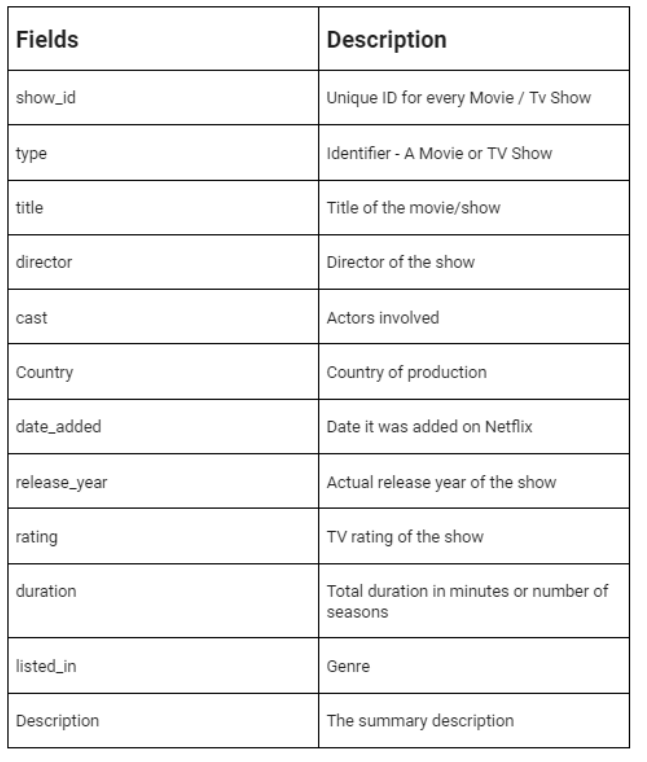

## ***2. Understanding Your Variables***

In [ ]:
# dataset.columns
movies_df.columns

In [ ]:
# Dataset Describe
# Getting some basic statistical information
movies_df.describe(include='all')

### Variables Description 

Total 7787 rows and 12 columns.

### Check Unique Values for each variable.

In [ ]:
#Unique values present in each feature
movies_df.nunique()

* We have a dataset of 7787 rows and 12 columns.
* We need to change the datatype of date_added column and we can also see there are some comma separated values we need to clean that columns.
* We can see there are some null values present in our dataset we will first treat those null values.

## 3. ***Data Wrangling***

### Data Wrangling Code

Rating: It appears like there is nothing wrong with 'rating'. But, to the viewer - ratings like 'TV-MA' or 'PG-13' means nothing. We just know that the rating means "for specific audiance". So, we want to conduct a research to understand all the ratings, and then change the text into a more readable, appropriate text

In [ ]:
print('TV Shows Ratings:',movies_df[movies_df['type'] == 'TV Show']['rating'].unique(),'\n')
print('Movies Ratings:',movies_df[movies_df['type'] == 'Movie']['rating'].unique())

Processing the 'rating' column'. Here we have 2 challenges, because not only we need to interpert what every rating means, we also need to change it to a more understandable text. Our course of action will be:

* Listing all the unique ratings for movies and TV shows.
* Check for similarities / differences between TV and movie ratings.
* Interpert what every rating means.
* Decide on new rating categories and change accordingly

We decided to categorize the different ratings based on CONTENT (and not AGE). From our understanding, there are 6 content categories in which we want to divide the ratings by:

* Kids
* All Ages
* Teens
* Brief Violence/Nude
* Adult Content
* Unrated

# **Classifying the 'rating' feature into three categories. (Kids, Teenagers, Adults)**

In Kids:

TV-Y,
TV-Y7,
TV-Y7-FV,
G,
TV-G,
PG,
TV-PG,  
In Teenagers:

PG-13,
TV-14,  
In Adults:

TV-MA,
R,
NC-17,
NR,
UR

In [ ]:
# change the rating in kids, teenager, adult
rating_cleaning = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
movies_df['rating_clean'] = movies_df['rating'].replace(to_replace = rating_cleaning)
movies_df['rating_clean'].unique()

In [ ]:
#Next task is to replace all NaN values with "Not Available"
movies_df = movies_df.fillna("Not Available")

**"Listed In"**: We did notice something odd in listed_in column. Values like "International TV Show" or "International Movie" are not genres. These are types of content. So, let's split all the "International" to a different column, and remove them from "

In [ ]:
movies_df['international'] = movies_df['listed_in'].apply(lambda x: "International" in x)
movies_df['listed_in'] = movies_df['listed_in'].apply(lambda x:x.split(", "))
movies_df[(movies_df['type'] =='TV Show') & (movies_df['international']=='True')]['listed_in'].apply(lambda x: x.remove("International TV Shows"))
movies_df[(movies_df['type'] == 'Movies') & (movies_df['international']=='True')]['listed_in'].apply(lambda x:x.remove("International Movies"))
movies_df['listed_in'] = movies_df['listed_in'].apply(lambda x:", ".join(x))

Let fix the data type of the features

In [ ]:
# type should be a category
movies_df['type']= pd.Categorical(movies_df['type'])

# change the rating_clean
movies_df['rating_clean'] = pd.Categorical(movies_df['rating_clean'], categories = ['Kids','Older Kids','Teens','Adults'])

## **Handling Comma Separated Values**

In [ ]:
movies_df.head(2)

we can see that cast,director,country,listed in variable are the comma separated value

In [ ]:
comma_columns = ['cast','director','country','listed_in']
for column in comma_columns:
  if len(movies_df[movies_df[column].str. startswith(",")]) > 0:
    print("In column:",column,"there are bad entries that BEGIN with a comma")
  if len(movies_df[movies_df[column].str. endswith(",")]) > 0:
    print("In column:",column,"there are bad entries that END with a comma")
  if len(movies_df[movies_df[column] == ''])>0:
    print("In column:",column,"there are bad entries that CONTAIN empty values ''")

    

In [ ]:
movies_df[movies_df['country'].str.endswith(",")]

There are only four rows'country. In which comma .let's remove the comma

In [ ]:
movies_df.loc[1402,'country'] = 'United States'
movies_df.loc[2315,'country'] = 'France, Belgium, Luxembourg, Cambodia'
movies_df.loc[2827,'country'] = 'Poland'
movies_df.loc[7433,'country'] = 'United Kingdom'

In [ ]:
movies_df[movies_df['country'].str.endswith(",")]

In [ ]:
movies_df['country'][1402]

In [ ]:
#movies_df['date_added'] = pd.to_datetime(movies_df['date_added'])

In [ ]:
movies_df.dtypes

In [ ]:
movies_df.shape

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Lets Check value counts of type with help of chart

In [ ]:
# Plotting graph for type
labels = ['Movie','TV_Show']
fig = px.pie(movies_df['type'], values=movies_df['type'].value_counts(),
             names = labels,
             color = labels,
             color_discrete_map={'Movie':'red','TV_Show':'Black'},
             hole = 0.4,width = 550,height=400)
fig.show()

## Netflix has 69% of its content as movies

## Movies are clearly more popular on Netflix than TV shows.

#### Chart - 2

### CountPlot for Rating

In [ ]:
# Movie Rating Analysis
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.set(style="ticks")
ax = sns.countplot(x="rating" ,data=movies_df,palette=["red"],order=movies_df['rating'].value_counts().index[0:15],edgecolor="black")

## TV-MA is the most given rating then TV-14.That means most of the shows are for adults.

#### Chart - 3

### **Countplot for releases over years**

In [ ]:
# Year wise analysis
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.set(style="ticks")
ax = sns.countplot(x="release_year", data= movies_df, palette=["red"],order = movies_df['release_year'].value_counts().index[0:10],edgecolor='Black')

## We can see after 2014 there is growth in the amount of content added.

## Top 10 genres for Movies/Shows on Netflix

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x = movies_df["listed_in"].value_counts().head(10).index,
            y = movies_df["listed_in"].value_counts().head(10).values,palette=["red"],edgecolor="Black")
plt.xticks(rotation=80)
plt.title("Top 10 Genre",size=16,fontweight= "bold")
plt.show()

## This Documentation shows the Top 10 Genre in the Netflix . Documentaries and Stand up Comedy are the most watched Genres.

#### Chart - 4

###**Top 20 Actors with most number of movies/shows on Netflix:**

In [ ]:
# Top 20 actors netflix
movies_df['cast_name'] = movies_df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in movies_df['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette=["red"],edgecolor="black")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

## This chart show the Top 20 Actor with most number of Movie/Show on Netflix



* We can see Anupam Kher, Takahiro Sakurai, Shah Rukh Khan, Om Puri,Boman Irani are among the top 5 actors worked on shows/movies on Netflix.
* Majority of Netflix movies are having Indian actors.In this list, we can see that the most popular actors on Netflix based on the number of titles are international as well

#### Chart - 5

# Country wise content for top countries

In [ ]:
# Chart - 5 visualization code
all_country = movies_df.groupby(['country','type']).count()['show_id'].reset_index()
all_country.head()

In [ ]:
country_count = {}
for i in range(len(all_country)):
  l = all_country['country'][i].split(', ')
  for x in l:
     x = re.sub('[^A-Za-z0-9 ]+', '', x)
     if x not in country_count.keys():
            country_count[x] = all_country['show_id'][i]
     else:
            country_count[x] += all_country['show_id'][i]
country_df = pd.DataFrame(list(zip(country_count.keys(), country_count.values())), columns =['country', 'count']) 

d = country_df.sort_values(by=['count'], ascending=False).head(10)
# .plot.bar(x='country',y='count',edgecolor='black')
fig = px.bar(d, x='country',y='count')
fig.update_traces(marker_color='red', marker_line_color='black',marker_line_width=2, opacity=1)
fig.update_layout(title='Content produced country wise')
fig.show()
top_30 = country_df.sort_values(by=['count'], ascending=False)['country'].head(30)

 ## United State and India has the most number of content.
 ## After that UK and that country which name are not available in the data

#### Chart - 6

## **Country Vs Director**

In [ ]:
def convertListToString(s):
  return ' '.join([str(elem) for elem in s])

movies_df['director']=movies_df['director'].apply(lambda x:convertListToString(x))

In [ ]:
#word cloud for user rating review
def func_select_Category(category_name,category_column,column_of_choice):
  df_word_cloud = movies_df[[category_column,column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud[category_column]==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.figure( figsize=(8,8), facecolor='white' )
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [ ]:
for i in ['India','United Kingdom','United States']:
  func_select_Category(i,'country','cast')

* In India we can see  Shah Rukh Khan, Naseeruddin Shah, Kareena Kapoor, Anupam Kher and many more.
* In UK we can see John, James, David, Katherine and many more.
* In US we can see Michael, Tom Adam, Scott, William,David, James and many more.

In [ ]:
for i in ['India','United Kingdom','United States']:
  func_select_Category(i,'country','listed_in')

* Most of the Comedy, Thriller, Romantic, International Movies is watched in India
* In UK International Show , Crime TV, International Tv  is watched on NetFlix
* IN US most of the Action , Adventure, Drama Movie, Sports Movie,Horror Movies, romantic Movies is watched on NetFlix




In [ ]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(movies_df['description'])

plt.rcParams['figure.figsize'] = (10,10)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1500,  height = 1500, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

 This wordCloud chart show the word repeated in description like Family, Life New Love etc 

 It means most of the Movie/Show story based on Family, murder,love,Friend,Team,daughter etc



#### Chart - 7

## **Is Netflix has increasingly focusing on Movies rather than TV Shows in recent years.?**

## **lets Check**

In [ ]:
# Chart subsetting data for visualisation
d1 = movies_df[movies_df["type"] == "TV Show"]
d2 = movies_df[movies_df["type"] == "Movie"]

col = "release_year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(
                    x=vc1[col], 
                    y=vc1["count"], 
                    name="TV Shows", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(
                    x=vc2[col], 
                    y=vc2["count"], 
                    name="Movies", 
                    marker= dict(color = 'rgb(255, 255, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'Content added over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'),template= "plotly_dark")
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show(renderer='colab')

##### 2. What is/are the insight(s) found from the chart?

# **Yes**

* Netflix has increasingly focusing on Movies rather than TV Shows from 2000.
* whiteline indicate the movies and red line indicate the TV Shows 
* From 2020 movies rapidly increase rather than Shows 

In [ ]:
movies_df.sample()

## ***5. Hypothesis Testing***

**Null Hypothesis**- All the price range group are similar according to the ram

**Alternative Hypothesis** - All the price range group are not similar according to the ram

In this hypothesis, we will check whether two or more categories of price ranges are similar or not based on their means similiarity and F score .

There are four different category of price ranges and their ram and other variables are given so we need to check all the basis of ram that all the three groups are similar or not.

## ***6. Feature Engineering & Data Pre-processing***

### 1. **Text Classification**

Text clarification is the process of categorizing the text into a group of words. By using NLP, text classification can automatically analyze text and then assign a set of predefined tags or categories based on its context. NLP is used for sentiment analysis, topic detection, and language detection.

In [ ]:
movies_df.dtypes

### 3. Categorical Encoding

First, we transform column data to a list so that we can do suitable actions in columns. Then we find the unique cast, directors, and genres for these columns.

In [ ]:
# Encode your categorical columns
movies_df.country = movies_df.country.str.split(',')
movies_df.loc[:, 'country'] = movies_df.country.map(lambda x: x[0])

#Taking the primary director into account for each record and not the others
movies_df.director = movies_df.director.str.split(',')
movies_df.loc[:, 'director'] = movies_df.director.map(lambda x: x[0])

#Taking the primary cast member into account for each record and not the others
movies_df.cast = movies_df.cast.str.split(',')
movies_df.loc[:, 'cast'] = movies_df.cast.map(lambda x: x[0])


In [ ]:
movies_df["combined_text_feat"] =movies_df['listed_in'].astype(str) + " " + movies_df['description'].astype(str) + " " + movies_df['type'].astype(str) + " "  + movies_df['country'].astype(str) + " " + movies_df['cast'].astype(str) + " " + movies_df['rating'].astype(str)

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In any Machine learning task, cleaning or preprocessing the data is as important as model building. Text data is one of the most unstructured forms of available data and when comes to deal with Human language then it’s too complex.

* Text Preprocessing Techniques
* Lower Case
* Remove Punctuations
* Remove words and digits containing digits
* Remove Stopwords
* Rephrase Text
* Stemming and Lemmatization
* Remove White spaces

# **Count Vectorizer**
Machines cannot understand characters and words. So when dealing with text data we need to represent it in numbers to be understood by the machine. Countvectorizer is a method to convert text to numerical data.

# **TF-IDF Vectorizer**
Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector. It combines 2 concepts, Term Frequency (TF) and Document Frequency (DF).




#### 1. Expand Contraction

In [ ]:
# Expand Contraction
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
def count_vectorizer_func(feature):
  # Create a count vectorizer object
  count_vectorizer = CountVectorizer()
  # fit the count vectorizer using the text data
  count_vectorizer.fit(movies_df[feature])
  # Collect the vocabulary items used in the vectorizer
  dictionary = count_vectorizer.vocabulary_.items()
  return dictionary

def vocab_func(dictionary):
  vocab = [ ]
  count_of_vocab = []
  for key , value in dictionary:
    vocab.append( key )
    count_of_vocab.append( value )
  # Store the count in panadas dataframe with vocab as index
  vocab_before_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
  # Sort the dataframe
  vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)
  return vocab_before_stemming


#Removing stopwords
# extracting the stopwords from nltk library
from nltk.stem import PorterStemmer

import re
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')

def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)


def clean_text(inp_str):

    # Lowercase text
    inp_str = inp_str.lower() 

    # Replace REPLACE_BY_SPACE_RE symbols by space in text
    inp_str = REPLACE_BY_SPACE_RE.sub(' ', inp_str) 
    
    # Remove the XXXX values
    inp_str = inp_str.replace('x', '') 
    
    # Remove white space
    inp_str = REMOVE_NUM.sub('', inp_str)

    # Remove symbols which are in BAD_SYMBOLS_RE from text
    inp_str = BAD_SYMBOLS_RE.sub('', inp_str) 

    # Remove stopwords from text
    inp_str = ' '.join(word for word in inp_str.split() if word not in STOPWORDS) 
    
    # Remove any words composed of less than 2 or more than 21 letters
    inp_str = ' '.join(word for word in inp_str.split() if (len(word) >= 2 and len(word) <= 21))

    # Stemming the words
    inp_str = ' '.join([stemmer.stem(word) for word in inp_str.split()])
    return inp_str

import re
def cleaned(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))


from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

def wordfilter(string, filtwords):
    filtered = []
    tokens = word_tokenize(string) 
    for word in tokens:
        if word not in filtwords:
            filtered.append(stemmer.stem(word))
    return filtered

def join_words(x):
  return " ".join(x)


def Apply_stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

def Tf_IDF_Vectorizer_func(feature):
  # Create the object of tfid vectorizer
  tfid_vectorizer = TfidfVectorizer()

  # Fit the vectorizer using the text data
  tfid_vectorizer.fit(movies_df[feature])

  # Collect the vocabulary items used in the vectorizer
  dictionary = tfid_vectorizer.vocabulary_.items()
  return dictionary

# REMOVE PUNCTUATION

In [ ]:
movies_df['description'] = movies_df['description'].apply(remove_punctuation)
movies_df.head()

#### 2. Lower Casing

In [ ]:
# Lower Casing
vocab_before_stemming = vocab_func(count_vectorizer_func('description'))
vocab_before_stemming.head()

In [ ]:
top15_most_ocurred_vocab = vocab_before_stemming.head(10)
top15_most_occurred_words = top15_most_ocurred_vocab.Word.values 
top15_most_occurred_words

#### Removing Stopwords & Removing White spaces

In [ ]:
print("Number of stopwords in english:", len(sw))

####  Text Normalization

## **Stemming** = Stemming is the process of reducing a word to its stem that affixes to suffixes and prefixes or to the roots of words

## In other words Stemming operation bundles together words of same root. e.g. stem operation bundles "response" and "respond" into a common "respon"


In [ ]:
# Remove White spaces
stemmer = PorterStemmer()
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
REMOVE_NUM = re.compile('[\d+]')
STOPWORDS = set(stopwords.words('english'))

In [ ]:
#applying the clean text funtion to the combined feature column for cleanup
movies_df["combined_text_feat"] = movies_df["combined_text_feat"].apply(clean_text)
movies_df["combined_text_feat"]

In [ ]:
movies_df['filtered'] = movies_df['description'] + ' '+ movies_df['listed_in']

In [ ]:
movies_df['filtered'] = movies_df['filtered'].apply(cleaned)

In [ ]:
movies_df['filtered' ]= movies_df['filtered'].str.lower()

In [ ]:
# Create an object of stemming function
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

In [ ]:
movies_df['filtered_new'] = ''
for item, row in movies_df.iterrows():
   movies_df.at[item, 'filtered_new'] = wordfilter(row['filtered'], stop_words)
    
movies_df['filtered_new']

In [ ]:
movies_df['filtered_new'] = movies_df['filtered_new'].apply(join_words)

In [ ]:
#Stemming for description
movies_df['description'] = movies_df['description'].apply( Apply_stemming )
movies_df.head()

#### Text Vectorization

In [ ]:
# Vectorizing Text
# Run TF IDF Vectorizer on the text data
from sklearn.feature_extraction.text import TfidfVectorizer

# sublinear_df is set to True to use a logarithmic form for frequency
# min_df is the minimum numbers of documents a word must be present in to be kept
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1
# ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams
# stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features

vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
X_vc = vectorizer.fit_transform(movies_df["combined_text_feat"])

pd.DataFrame(X_vc.toarray(), columns=vectorizer.get_feature_names()).head()

##### tf-idf weight is product of two terms: the first term is the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.
TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
IDF(t) = 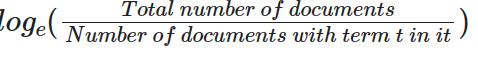
 


###  Data Scaling

In [ ]:
# Scaling your data
words = movies_df.filtered_new
t_vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 1, max_features=10000)
X= t_vectorizer.fit_transform(words)
X

In [ ]:
X.shape

In [ ]:
vocab_after_stemming=vocab_func(count_vectorizer_func('description'))

In [ ]:
top15_most_ocurred_vocab = vocab_after_stemming.head(15)

In [ ]:
movies_df['Length(description)'] = movies_df['description'].apply(lambda x: len(x))

In [ ]:
movies_df.description.iloc[0]

In [ ]:
movies_df['listed_in'] = movies_df['listed_in'].apply(remove_punctuation)
movies_df.head()

In [ ]:
#Remove stopwords for listed_in(genres)
movies_df['listed_in'] = movies_df['listed_in'].apply( remove_stopwords )
movies_df.head()

In [ ]:
listed_in_vocab_before_stem=vocab_func(count_vectorizer_func('listed_in'))

In [ ]:
listed_in_vocab_before_stem=vocab_func(count_vectorizer_func('listed_in'))

In [ ]:
listed_in_vocab_before_stem

In [ ]:
#SNOWBALL STEMMER FOR ENGLISH
#Stemming for description
movies_df['listed_in'] = movies_df['listed_in'].apply( Apply_stemming )
movies_df.head()

In [ ]:
vocab_after_stemming_listed_in=vocab_func(Tf_IDF_Vectorizer_func('listed_in'))

In [ ]:
movies_df['Length(listed_in)'] = movies_df['listed_in'].apply(lambda x: len(x))
movies_df.head()

In [ ]:
# fit StandardScaler

X_features_rec = movies_df[['Length(description)','Length(listed_in)']]
stdscaler = preprocessing.StandardScaler()
X_features_rec.describe()

In [ ]:
X_rescale=stdscaler.fit_transform(X_features_rec)
X=X_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]

##  **ML Model Implementation**

# **Clustering:**
Clustering can be considered the most important unsupervised learning problem. So, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data. A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”.

A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.

We have used 5 clustering algorithms:

1.Silhouette score(KMeans)

2.Elbow Method(KMeans)

3.DBSCAN

4.Dendrogram

5.Agglomerative clustering

# **KMEANS**
K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.bold text

# Model 1 : KMeans

In [ ]:
# fit KMeans Clustering algorithm in the dataset
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 2)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

In [ ]:
# Lets K_cluster = 45
k_clusters = 45

In [ ]:
#Clustering the dataset with the optimal number of clusters
model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=42)
model.fit(X)

# Silhouette_Score

# **Silhouette Score**
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

In [ ]:
#Predict the clusters and evaluate the silhouette score
clusters = model.predict(X)
score = silhouette_score(X, clusters)
print("Silhouette score is {}".format(score))

In [ ]:
#Adding a seperate column for the clusters
movies_df["Cluster Label"] = clusters
movies_df.head()

In [ ]:
temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp.head(15)

In [ ]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.hsv_r(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    #ax1.set_facecolor("white")
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.grid(False)
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.hsv_r(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.grid(False)
    #ax2.set_facecolor("white")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

Silhouette Score = (b-a)/max(a,b)

where

a= average intra-cluster distance i.e the average distance between each point within a cluster.

b= average inter-cluster distance i.e the average distance between all clusters.

### ML Model - 2

# **ELBOW METHOD**

The Elbow method is one of the most popular ways to find the optimal number of clusters. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluste

In [ ]:
sum_of_square_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_square_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_square_dist.keys()), y = list(sum_of_square_dist.values()),color="red")
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

We will use 5 clusters.We can see from the above graph that 5 is the elbow point

In [ ]:
kmeans = KMeans(n_clusters = 5 )
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

In [ ]:
plt.figure(figsize=(14,10))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=60, cmap='rainbow')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)

# **DBSCAN**

DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=20).fit_predict(X)
plt.figure(figsize=(10,6))

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

# Model 3 - **HIERARCHICAL CLUSTERING**

Hierarchical clustering is an unsupervised learning method for clustering data points. The algorithm builds clusters by measuring the dissimilarities between data. Unsupervised learning means that a model does not have to be trained, and we do not need a "target" variable. This method can be used on any data to visualize and interpret the relationship between individual data points.

In [ ]:
#  importing sch
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(14,10))

sch.set_link_color_palette(['#b30000','#996600', '#b30086'])
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'),above_threshold_color="green")
plt.axhline(y=70, color='r', linestyle='--')
 # find largest vertical distance we can make without crossing any other horizontal line
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() 

# **Agglomerative Clustering** 

Also known as bottom up approach. A structure that is more informative than the unstructured set of clusters returned by flat clustering. This clustering algorithm does not require us to prespecify the number of clusters.

In [ ]:
from scipy.spatial.distance import euclidean
# import agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean' , linkage = 'ward')
y_hc = hc.fit_predict(X)

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(14,10))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')


plt.title('Clusters of content')

plt.legend()
plt.show()

# **PCA(Principal Component Analysis)**

PCA is an unsupervised statistical technique used to examine the interrelations among a set of variables. It is also known as a general factor analysis where regression determines a line of best fit.

In [ ]:
#Applying PCA for dimenstionality reduction
from sklearn.decomposition import PCA
from matplotlib import rcParams
pca = PCA(n_components = 2)
y = pca.fit_transform(X_vc.toarray())
kmeans = KMeans(n_clusters=5, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(y)
y_pred = kmeans.predict(y)

plt.figure(figsize=(14,8))

rcParams['axes.facecolor'] = 'gainsboro'
rcParams["figure.facecolor"] = 'black'
plt.scatter(y[:, 0], y[:, 1], c=y_pred, s=40, cmap='gnuplot',linewidths=6)

#plt.grid(b=None)

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='red', s=200, alpha=1);


In [ ]:
score = silhouette_score(y,y_pred)
print("Silhouette_score is {}".format(score))

In [ ]:
# Function for getting most commom words in each cluster
def get_common_words_cluster(vc_arr, y_pred, n_feats):
    labels = np.unique(y_pred)
    dfs=[]
    for label in labels:
      id_temp = np.where(y_pred==label)
      x_means = np.mean(vc_arr[id_temp],axis=0)
      sorted_means = np.argsort(x_means)[::-1][:n_feats] 
      features = vectorizer.get_feature_names()
      common_words = [(features[i], x_means[i]) for i in sorted_means]
      df = pd.DataFrame(common_words, columns = ['words', 'count'])
      dfs.append(df)
    return dfs


In [ ]:
#Function for data visualization of the most commin words in each cluster
def plot_common_words(dfs, num):
    for i in range(0, len(dfs)):
        plt.figure(figsize=(10, 4))
        plt.title(("Most Common Words in the Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'count' , y = 'words', orient = 'h' , data = dfs[i][:num],palette = 'plasma')

dfs = get_common_words_cluster(X_vc.toarray(), y_pred, 5)
plot_common_words(dfs, 5)

In [ ]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()
for i in range(k_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :k_clusters]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

In [ ]:
movies_df['cluster'] = kmeans.labels_
movies_df.head()

In [ ]:
#Function for getting the some of the same cluster item details
def find_same_cluster_items(name_nf):
  inp_nf =movies_df.loc[movies_df['title'].str.lower() == name_nf.lower()]
  num = inp_nf.cluster.iloc[0]
  type_nf = inp_nf.type.iloc[0]
  temp_df = movies_df.loc[(movies_df['cluster'] == num) & (movies_df['type']==type_nf)]
  temp_df = temp_df.sample(10)
  print("The cluster number is {}".format(num))
   #print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
  return list(temp_df['title'])

In [ ]:
find_same_cluster_items('zodiac')

In [ ]:
find_same_cluster_items('Zindagi Na Milegi Dobara')

In [ ]:
find_same_cluster_items('Dear Zindagi')

# **Recommendation System**

A recommender system, or a recommendation system, is a subclass of information filtering system that seeks to predict the “rating” or “preference” a user would give to an item. They are primarily used in commercial applications.The famous The Netflix Prize is also a competition in the context of recommendation systems.



In [ ]:
from sklearn.metrics.pairwise import linear_kernel
# compute the cosine similarity matrix
cosine_sim = linear_kernel(X_vc,X_vc)


In [ ]:
indices = pd.Series(movies_df.index, index=movies_df['title']).drop_duplicates()


In [ ]:
def get_recommendations(title, cosine_sim = cosine_sim):
  idx = indices[title]
  sim_scores=list(enumerate(cosine_sim[idx]))
  sim_scores=sorted(sim_scores, key=lambda x:x[1], reverse=True)
  sim_scores=sim_scores[1:11]
  movie_indices = [i[0] for i in sim_scores]
  return movies_df['title'].iloc[movie_indices]

In [ ]:
get_recommendations('Dear Zindagi')

In [ ]:
get_recommendations('Zindagi Na Milegi Dobara')

In [ ]:
find_same_cluster_items('Dear Zindagi')

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. The dataset contains 7787 rows and 12 columns, cast and director columns have a lot of missing values so we dropped them and we have 10 features for the further analysis.

2. We have two types of content movies and TV shows.

3. Netflix has 69% of its content as movies, so we can say that movies are clearly more popular on Netflix than TV shows.

4. For mature audience, there is much more movie content than TV shows. However, for the younger audience (under the age of 17),there are more TV shows than movies.

5. Netflix has started adding content since 2014,highest number of movies and tv shows added in the year 2019,there is consistent content addition to netflix across the year.

6. The average duration of a movie on netflix is 90 minutes.

7. With respect to available content,the United States is on the top.India is at second followed by the UK and Canada. China is not even close to the top.

8. In terms of genres, Dramas is on the top followed by Comedies and Documentaries.

9. Number of movies added to netflix is higher than that of TV shows. In 2019, netflix added 1497 movies and 656 TV shows. So there we cannot conclude that netflix has switched focus from movies to TV shows.

10. Principal component analysis was performed inorder to reduce the higher dimensionality which improved the silhouette coefficient to 0.34118.

11. Clusters are identified for each of the record in the dataset.

12. Recommendation based on cosine similiarity is done.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***